In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from parameters.data_path import DIR_PROCESSED, DIR_OUTPUT
from parameters.variables import LABEL2ID

In [2]:
# numpy.ndarrayの表示で指数表記をしないようにする
np.set_printoptions(suppress=True)

def get_matrix(df):
    # どのラベルからどのラベルに遷移したかをカウントする
    # 縦軸が遷移先、横軸が遷移元
    matrix = np.zeros((5, 5))
    for id_ in df["id"].unique():
        df_id = df[df["id"] == id_]
        for i in range(1, len(df_id)):
            matrix[df_id.iloc[i]["label"], df_id.iloc[i-1]["label"]] += 1
    print(matrix)
    # plt.imshow(matrix)を2枚横に並べて表示する
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(matrix)
    for i in range(5):
        matrix[i][i] = None
    axes[1].imshow(matrix)

[[71890.  1151.   644.    87.   324.]
 [ 2058.  9982.  1260.    60.   518.]
 [  104.  2300. 42634.  1730.   248.]
 [    4.     7.  1877.  6628.     1.]
 [   55.   431.   595.    12. 16902.]]


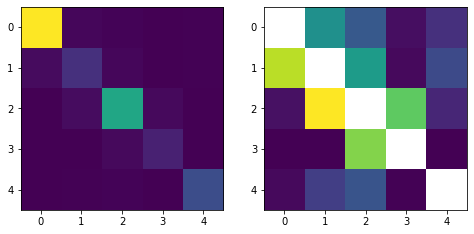

In [ ]:
df = pd.read_csv(f"{DIR_PROCESSED}/train_df_meta.csv")
get_matrix(df)

[[14506.   462.   261.    47.   134.]
 [  859.  3474.   637.    11.   143.]
 [   24.  1048. 18468.   456.   199.]
 [    1.     0.   516.  3603.     1.]
 [   20.   140.   313.     4.  6924.]]


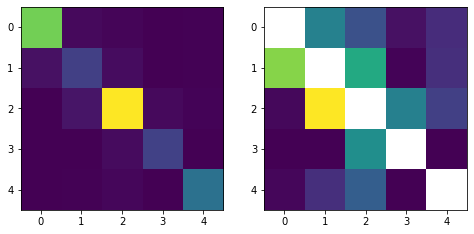

In [ ]:
df_pred1 = pd.read_csv(f"{DIR_OUTPUT}/submits/230119_b0_meta_5_noaug_v1.csv")
df_pred1["label"] = df_pred1["condition"].map(LABEL2ID)
get_matrix(df_pred1)

[[14505.   462.   261.    47.   134.]
 [  859.  3475.   637.    11.   143.]
 [   24.  1048. 18468.   455.   198.]
 [    1.     0.   515.  3605.     1.]
 [   20.   140.   312.     4.  6926.]]


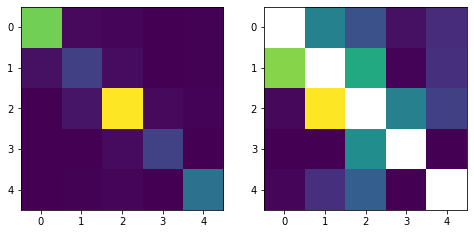

In [ ]:
df_pred2 = pd.read_csv(f"{DIR_OUTPUT}/submits/230119_b0_meta_5_noaug.csv")
df_pred2["label"] = df_pred2["condition"].map(LABEL2ID)
get_matrix(df_pred2)

[[14161.   439.   356.    45.   153.]
 [  879.  2800.   602.     9.   303.]
 [   61.  1044. 19111.   539.   240.]
 [    0.     0.   595.  3505.     0.]
 [   53.   310.   331.     2.  6713.]]


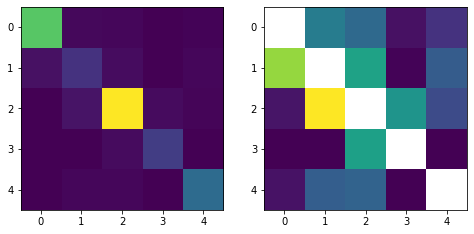

In [ ]:
df_pred3 = pd.read_csv(f"{DIR_OUTPUT}/submits/submit_efficientnet_b0_add_metadata_v5.csv")
df_pred3["label"] = df_pred3["condition"].map(LABEL2ID)
get_matrix(df_pred3)

LBが低いもの（0.822）でやってみる

[[14397.   567.   485.    73.   278.]
 [  964.  1989.   853.     5.   377.]
 [  226.  1229. 17638.   554.   665.]
 [    4.     0.   628.  3518.     0.]
 [  209.   403.   708.     0.  6481.]]


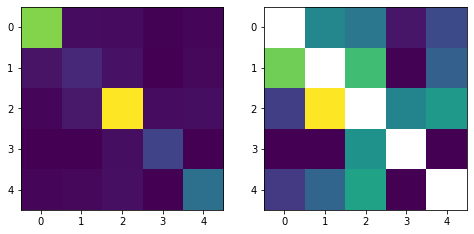

In [4]:
df_pred4 = pd.read_csv(f"{DIR_OUTPUT}/submits/230112_tfb0nomix.csv")
df_pred4["label"] = df_pred4["condition"].map(LABEL2ID)
get_matrix(df_pred4)